In [1]:
%pylab inline
import pandas
import sqlite3
import pymc3
import seaborn as sns
from sklearn import *
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


/home/riri/.virtualenvs/mxnet-3/lib/python3.4/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/home/riri/.virtualenvs/mxnet-3/lib/python3.4/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [2]:
con = sqlite3.connect('/tmp/data.sqlite3')

In [3]:
data = pandas.read_sql('SELECT * FROM data where adjusted_demand is not null and rand = 1', con=con)

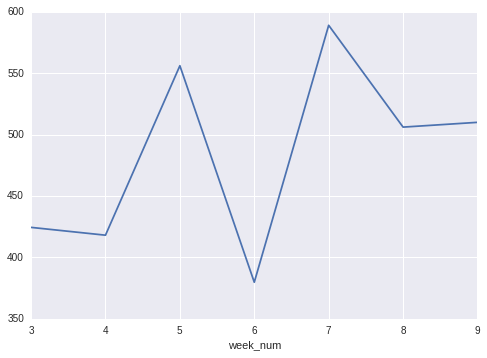

In [4]:
data.groupby('week_num').adjusted_demand.agg({'avg_val': np.mean, 'variance': np.var}).variance.plot()

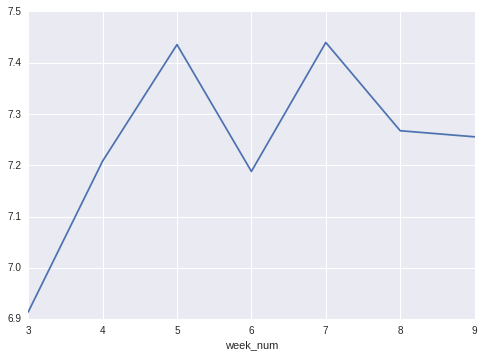

In [5]:
data.groupby('week_num').adjusted_demand.agg({'avg_val': np.mean, 'variance': np.var}).avg_val.plot()

# Conclusion

This suggests there may not be much variation week to week.

In [13]:
data.groupby('week_num').adjusted_demand.agg([mean, std, median, lambda p: np.percentile(p, 75)])

,mean,std,median,<lambda>
week_num,,,,
3,6.913337,20.602597,3,6
4,7.208290,20.447744,3,6
5,7.436029,23.582812,3,7
6,7.188152,19.488179,3,6
7,7.440220,24.270991,3,7
8,7.267683,22.497718,3,7
9,7.255787,22.583911,3,6
